# Data Mining, data structure and Algorithem


## Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import scipy 
import pandas as pd
import numpy as np

reading the label.csv into a panda data_frame called df, and showing the two top rows

In [2]:
df = pd.read_csv('Label.csv' )
df.head(2)

FileNotFoundError: [Errno 2] File b'Label.csv' does not exist: b'Label.csv'

In [35]:
df1 = df[['file_name', 'brand_name', 'product_name', 'Price',]]
df1.head(5)

,file_name,brand_name,product_name,Price
0,0_0_001.png,Christian Louboutin,shoes,293.43
1,0_0_002.png,Christian Louboutin,shoes,299.84
2,0_0_003.png,Christian Louboutin,shoes,216.33
3,0_0_004.png,Christian Louboutin,shoes,1.71
4,0_0_005.png,Christian Louboutin,shoes,297.71


In [13]:
df1.describe() #getting some statistical information from the data fram

,Price
count,2184.000000
mean,151.256786
std,86.216570
min,0.520000
25%,76.310000
50%,154.815000
75%,226.012500
max,299.920000


some extra tables to get additional information. It shows the most expensive product for each brand.

In [14]:
df_sorted = df.groupby(['brand_name','product_label'])['Price'].max()
df_sorted.head(20)

brand_label  product_label
0            0                299.84
             1                281.29
             2                277.22
             3                295.73
             8                298.02
1            0                275.70
             1                282.72
             2                287.51
             3                279.57
             4                294.76
             5                295.06
             6                298.42
             7                285.51
             8                283.12
             9                298.29
2            0                294.86
             1                290.36
             2                292.66
             3                282.12
             4                280.69
Name: Price, dtype: float64

In [15]:
df.loc[df['Price'].idxmax()]  #most expensive item

brand_name       Christian Dior
brand_label                   4
product_name            watches
product_label                 5
file_name           4_5_033.png
Price                    299.92
Name: 1453, dtype: object

In [16]:
df.loc[df['Price'].idxmin()]  #cheapest item

brand_name             Gucci
brand_label                3
product_name         watches
product_label              5
file_name        3_5_003.png
Price                   0.52
Name: 1040, dtype: object

Grouping each items in regards to thier price. 

In [17]:
bins = np.linspace(np.floor(min(df['Price'])),np.ceil(max(df['Price'])),10)

df1["Price_bined"] = pd.cut(df1['Price'],bins,include_lowest=True)
df1.head(10)

/Users/HadiGorak/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,file_name,brand_name,product_name,Price,Price_bined
0,0_0_001.png,Christian Louboutin,shoes,293.43,"(266.667, 300.0]"
1,0_0_002.png,Christian Louboutin,shoes,299.84,"(266.667, 300.0]"
2,0_0_003.png,Christian Louboutin,shoes,216.33,"(200.0, 233.333]"
3,0_0_004.png,Christian Louboutin,shoes,1.71,"(-0.001, 33.333]"
4,0_0_005.png,Christian Louboutin,shoes,297.71,"(266.667, 300.0]"
5,0_0_006.png,Christian Louboutin,shoes,246.77,"(233.333, 266.667]"
6,0_0_007.png,Christian Louboutin,shoes,114.27,"(100.0, 133.333]"
7,0_0_008.png,Christian Louboutin,shoes,296.94,"(266.667, 300.0]"
8,0_0_009.png,Christian Louboutin,shoes,231.29,"(200.0, 233.333]"
9,0_0_010.png,Christian Louboutin,shoes,244.13,"(233.333, 266.667]"


This small function create the additional column that categorize the items based on thier price. for instance any item with the price ranged [267,300] groups to gether. This will reduce the complexity of optimaization later on.

Text(0, 0.5, 'frequency')

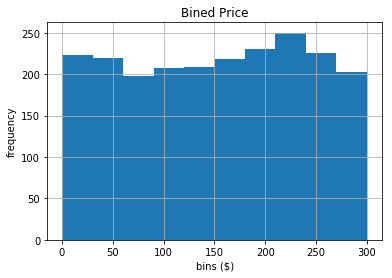

In [18]:
# Histogram of the price ranged, 

hist_Price = df["Price"].hist(bins=10, alpha=1)
hist_Price.set_title('Bined Price')
hist_Price.set_xlabel('bins ($)')
hist_Price.set_ylabel('frequency')


In [19]:
Category_count = df['brand_name'].value_counts()
Category_count.rename(column={'brand_name':'value_count'}, inplace=True)
Category_count.index.name = 'value-count'
Category_count.head(7)

value-count
Christian Dior         468
Chanel                 344
Gucci                  333
Yves Saint Laurent     288
Dolce & Gabbana        267
Versace                247
Christian Louboutin    237
dtype: int64

The pie chart for the number of item in each brand.

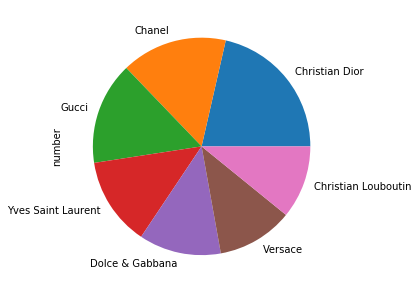

In [20]:
count_f = pd.DataFrame({'brand': ['Christian Dior', 'Chanel' , 'Gucci', 'Yves Saint Laurent',
                            'Dolce & Gabbana', 'Versace', 'Christian Louboutin'],
                   'number': [468, 344, 333, 288, 267, 247, 237]},
                   index=['Christian Dior', 'Chanel' , 'Gucci', 'Yves Saint Laurent',
                            'Dolce & Gabbana', 'Versace', 'Christian Louboutin'])
plot = count_f.plot.pie(y='number', figsize=(5, 5), legend=None)

In [21]:
Category_count = df['product_name'].value_counts()
Category_count.rename(column={'product_name':'value_count'}, inplace=True)
Category_count.index.name = 'product-count'
Category_count.head(10)

product-count
shoes          457
handbag        419
lipstick       228
ring           196
earrings       164
boots          158
nail polish    154
necklace       150
watches        137
bracelet       121
dtype: int64

The pie chart for the number of item in each product.

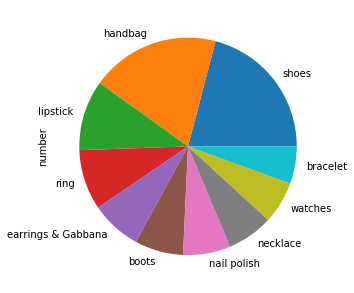

In [22]:
product_f = pd.DataFrame({'brand': ['shoes', 'handbag' , 'lipstick', 'ring',
                            'earrings & Gabbana', 'boots', 'nail polish','necklace', 'watches', 'bracelet'],
                   'number': [457, 419, 228, 196, 164, 158, 154, 150, 137, 121]},
                   index=['shoes', 'handbag' , 'lipstick', 'ring',
                            'earrings & Gabbana', 'boots', 'nail polish','necklace', 'watches', 'bracelet'])
plot = product_f.plot.pie(y='number', figsize=(5, 5), legend=None)

Creating a pivot table for the brands and the products and thier mean prices

In [23]:
df_test = df[['product_name', 'brand_name', 'Price']]
df_grp = df_test.groupby(['brand_name','product_name'], as_index=False).mean()

In [24]:
df_pivot = df_grp.pivot(index='brand_name', columns= 'product_name')
df_pivot

Price                                      \
product_name              boots    bracelet    earrings     handbag   
brand_name                                                            
Chanel               144.852813  110.218095  155.601667  157.689091   
Christian Dior       156.542105  135.988387  136.744898  157.235652   
Christian Louboutin  149.541724         NaN         NaN  142.283571   
Dolce & Gabbana      170.140556  146.936000  180.730000  163.298235   
Gucci                148.664667  144.848333  147.578000  143.910588   
Versace              153.445000  143.512500  130.510952  158.620921   
Yves Saint Laurent   168.580000  152.808333  175.328095  155.529273   

                                                                     \
product_name           lipstick nail polish    necklace        ring   
brand_name                                                            
Chanel               143.347667  168.381176  168.225952  137.221724   
Christian Dior       138.004464  153.878065  166.152308  160.282683   
Christian Louboutin  153.353636  144.014737         NaN         NaN   
Dolce & Gabbana      117.595263  120.421429  118.901667  160.227143   
Gucci                151.790000  192.891111  143.067273  129.457234   
Versace                     NaN         NaN  138.230000  189.143478   
Yves Saint Laurent   167.016939  166.108667  129.890667  119.182500   

                                             
product_name              shoes     watches  
brand_name                                   
Chanel               164.515849  159.125714  
Christian Dior       138.357333  139.629362  
Christian Louboutin  163.762041         NaN  
Dolce & Gabbana      157.893099  114.784000  
Gucci                141.164750  142.948077  
Versace              149.056333  165.821053  
Yves Saint Laurent   147.162600         NaN

### Just a show case of seaborn as the visualization tools

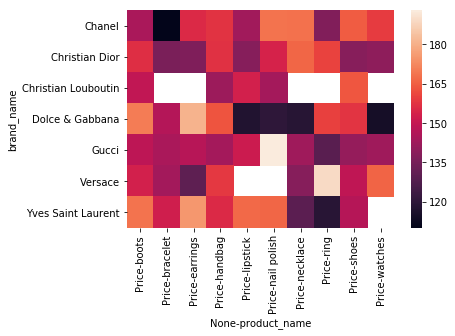

In [25]:
import seaborn as sns
sns.heatmap(df_pivot, annot=False)

## Anova measures between the prices of "Dior" and "versace"

In [26]:
df_anova = df[['brand_name','Price']]
grouped_anova = df_anova.groupby(['brand_name'])

In [27]:
anova_results_1 = scipy.stats.f_oneway(grouped_anova.get_group('Christian Dior')['Price'],
                                 grouped_anova.get_group('Versace')['Price'] )
anova_results_1

F_onewayResult(statistic=0.7952397335013653, pvalue=0.37282127448409363)

This indicate there is a large correlation between the brands name and the price 

In [28]:
df_anova_2 = df[['product_name','Price']]
grouped_anova_2 = df_anova_2.groupby(['product_name'])

In [29]:
anova_results_2 = scipy.stats.f_oneway(grouped_anova_2.get_group('shoes')['Price'],
                                 grouped_anova_2.get_group('boots')['Price'] )
anova_results_2

F_onewayResult(statistic=0.11235906768562738, pvalue=0.7375888670733441)

This indicate there is a small correlation between the product shoes, and boots pricewise.

(0, 315.1425120180937)

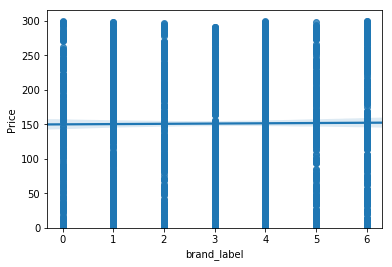

In [30]:
sns.regplot(x='brand_label', y='Price', data=df)
plt.ylim(0,)

## Transforming the .csv file to the sql form, then assigning the "file_name" as the primary key

In [31]:
x = df1["file_name"]
np.unique(x).size == len(x)
import collections
for item, count in collections.Counter(x).items():
    if count > 1:
        print(item)

Unfortunately there is no way  to set a primary key in the pandas df.to_sql() method directly. Additionally, just to make things more of a pain there is no way to set a primary key on a column in sqlite after a table has been created. A work around is to create the table in sqlite with the pandas df.to_sql() method. Then one could create a duplicate table and set the primary key followed by copying your data over. 

In [32]:
# Some functions that provide a work around

import re
def get_create_table_string(tablename, connection):
    sql = """
    select * from sqlite_master where name = "{}" and type = "table"
    """.format(tablename) 
    result = connection.execute(sql)
    
    create_table_string = result.fetchmany()[0][4]
    return create_table_string

def add_pk_to_create_table_string(create_table_string, colname):
    regex = "(\n.+{}[^,]+)(,)".format(colname)
    return re.sub(regex, "\\1 PRIMARY KEY,",  create_table_string)
    
def add_pk_to_sqlite_table(tablename, index_column, connection):
    cts = get_create_table_string(tablename, connection)
    cts = add_pk_to_create_table_string(cts, index_column)
    template = """
    BEGIN TRANSACTION;
        ALTER TABLE {tablename} RENAME TO {tablename}_old_;
        
        {cts};
        
        INSERT INTO {tablename} SELECT * FROM {tablename}_old_;
        
        DROP TABLE {tablename}_old_;
        
    COMMIT TRANSACTION;
    """
    
    create_and_drop_sql = template.format(tablename = tablename, cts = cts)
    connection.executescript(create_and_drop_sql)

checking to see if there is a repeated file name

Transforming the panda dataframe to sql files.

In [40]:
import sqlite3

con = sqlite3.connect("deleteme.db")
df1.to_sql("T1", con, if_exists="replace")

In [41]:
add_pk_to_sqlite_table("T1", "file_name", con)
r = con.execute("select sql from sqlite_master where name = 'df1' and type = 'table'")
print(r.fetchone()[0])

CREATE TABLE "df1" (
"index" INTEGER,
  "file_name" TEXT PRIMARY KEY,
  "brand_name" TEXT,
  "product_name" TEXT,
  "Price" REAL
)


In [8]:
%load_ext sql
%sql sqlite://

'Connected: @None'

In [44]:
%%sql 
CREATE TABLE "T1" (
"index" INTEGER,
  "file_name" TEXT PRIMARY KEY,
  "brand_name" TEXT,
  "product_name" TEXT,
  "Price" REAL
)

 * sqlite://
Done.


[]

# Shopping Backet Problem

In [56]:
# A greedy algorithem for the basket problem, Assuming that we can buy an Item only once


In [58]:
df_A = pd.read_csv('Label.csv' )
df_A.head(2)

,brand_name,brand_label,product_name,product_label,file_name,Price
0,Christian Louboutin,0,shoes,0,0_0_001.png,293.43
1,Christian Louboutin,0,shoes,0,0_0_002.png,299.84


In [61]:
df_B = df_A[['file_name', 'brand_name', 'product_name', 'Price',]]
df_B.head(5)

,file_name,brand_name,product_name,Price
0,0_0_001.png,Christian Louboutin,shoes,293.43
1,0_0_002.png,Christian Louboutin,shoes,299.84
2,0_0_003.png,Christian Louboutin,shoes,216.33
3,0_0_004.png,Christian Louboutin,shoes,1.71
4,0_0_005.png,Christian Louboutin,shoes,297.71


In [71]:
df_sorted = df_B.sort_values('Price', ascending=False)

In [72]:
df_sorted.head(5)

,file_name,brand_name,product_name,Price
1453,4_5_033.png,Christian Dior,watches,299.92
1,0_0_002.png,Christian Louboutin,shoes,299.84
2007,6_2_013.png,Yves Saint Laurent,handbag,299.80
2067,6_3_018.png,Yves Saint Laurent,nail polish,299.31
1815,5_5_017.png,Versace,watches,299.03


In [119]:
sum = 0
iter = 0
for row in df_sorted.iterrows():    
        sum = sum + df_sorted.Price[row[0]]
        iter += 1
        if sum <= 3020 and sum > 2980:
            print("Minimum {} item is necessary and total cost would be {}$".format(iter, sum))
            break
    

Minimum 10 item is necessary and total cost would be 2990.65$


#### the minimum number of item that cost 3020 > S >2980 is 10 Item 

I used a very gready algorithem, and I kinda cheat by using the sort functionality of the panda library.
One may write a function to do the sorting of the data_frome. Unfortunatly I did not have time to do it. The time/space complexity of the problem stems from the sorting of the data_frame which is a O(nlogn) and n is the number of the rows.  


If I had time I would use a bucket sort algorithem to sort the data_frame by the price, 
and it has O(N(klogk)) where N is the Number of the Buckets and k is the number of items in each buckets.
I assume that the price id uniformely distributed in the space. The histogram of the data agrees with it.